<a href="https://colab.research.google.com/github/Jhwan02/AI_LAB/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torchaudio

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(torch.__version__)
print(torchaudio.__version__)
print(device)

2.8.0+cu126
2.8.0+cu126
cuda


In [19]:
import IPython
import matplotlib.pyplot as plt

In [20]:
symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)


def text_to_sequence(text):
    text = text.lower()
    return [look_up[s] for s in text if s in symbols]


text = "Hello, my name is Jonghwan Shin. I am a third-year student in the Department of Software at Chungbuk National University. Recently, I have developed an interest in watching baseball, and I enjoy spending my free time following games and supporting my favorite teams."
print(text_to_sequence(text))

[19, 16, 23, 23, 26, 6, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11, 21, 26, 25, 18, 19, 34, 12, 25, 11, 30, 19, 20, 25, 7, 11, 20, 11, 12, 24, 11, 12, 11, 31, 19, 20, 29, 15, 1, 36, 16, 12, 29, 11, 30, 31, 32, 15, 16, 25, 31, 11, 20, 25, 11, 31, 19, 16, 11, 15, 16, 27, 12, 29, 31, 24, 16, 25, 31, 11, 26, 17, 11, 30, 26, 17, 31, 34, 12, 29, 16, 11, 12, 31, 11, 14, 19, 32, 25, 18, 13, 32, 22, 11, 25, 12, 31, 20, 26, 25, 12, 23, 11, 32, 25, 20, 33, 16, 29, 30, 20, 31, 36, 7, 11, 29, 16, 14, 16, 25, 31, 23, 36, 6, 11, 20, 11, 19, 12, 33, 16, 11, 15, 16, 33, 16, 23, 26, 27, 16, 15, 11, 12, 25, 11, 20, 25, 31, 16, 29, 16, 30, 31, 11, 20, 25, 11, 34, 12, 31, 14, 19, 20, 25, 18, 11, 13, 12, 30, 16, 13, 12, 23, 23, 6, 11, 12, 25, 15, 11, 20, 11, 16, 25, 21, 26, 36, 11, 30, 27, 16, 25, 15, 20, 25, 18, 11, 24, 36, 11, 17, 29, 16, 16, 11, 31, 20, 24, 16, 11, 17, 26, 23, 23, 26, 34, 20, 25, 18, 11, 18, 12, 24, 16, 30, 11, 12, 25, 15, 11, 30, 32, 27, 27, 26, 29, 31, 20, 25, 18, 11, 24, 36, 11, 1

In [21]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "Hello, my name is Jonghwan Shin. I am a third-year student in the Department of Software at Chungbuk National University. Recently, I have developed an interest in watching baseball, and I enjoy spending my free time following games and supporting my favorite teams."
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[19, 16, 23, 23, 26,  6, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11,
         21, 26, 25, 18, 19, 34, 12, 25, 11, 30, 19, 20, 25,  7, 11, 20, 11, 12,
         24, 11, 12, 11, 31, 19, 20, 29, 15,  1, 36, 16, 12, 29, 11, 30, 31, 32,
         15, 16, 25, 31, 11, 20, 25, 11, 31, 19, 16, 11, 15, 16, 27, 12, 29, 31,
         24, 16, 25, 31, 11, 26, 17, 11, 30, 26, 17, 31, 34, 12, 29, 16, 11, 12,
         31, 11, 14, 19, 32, 25, 18, 13, 32, 22, 11, 25, 12, 31, 20, 26, 25, 12,
         23, 11, 32, 25, 20, 33, 16, 29, 30, 20, 31, 36,  7, 11, 29, 16, 14, 16,
         25, 31, 23, 36,  6, 11, 20, 11, 19, 12, 33, 16, 11, 15, 16, 33, 16, 23,
         26, 27, 16, 15, 11, 12, 25, 11, 20, 25, 31, 16, 29, 16, 30, 31, 11, 20,
         25, 11, 34, 12, 31, 14, 19, 20, 25, 18, 11, 13, 12, 30, 16, 13, 12, 23,
         23,  6, 11, 12, 25, 15, 11, 20, 11, 16, 25, 21, 26, 36, 11, 30, 27, 16,
         25, 15, 20, 25, 18, 11, 24, 36, 11, 17, 29, 16, 16, 11, 31, 20, 24, 16,
         11, 17, 26, 23, 23,

In [22]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['h', 'e', 'l', 'l', 'o', ',', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'j', 'o', 'n', 'g', 'h', 'w', 'a', 'n', ' ', 's', 'h', 'i', 'n', '.', ' ', 'i', ' ', 'a', 'm', ' ', 'a', ' ', 't', 'h', 'i', 'r', 'd', '-', 'y', 'e', 'a', 'r', ' ', 's', 't', 'u', 'd', 'e', 'n', 't', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'd', 'e', 'p', 'a', 'r', 't', 'm', 'e', 'n', 't', ' ', 'o', 'f', ' ', 's', 'o', 'f', 't', 'w', 'a', 'r', 'e', ' ', 'a', 't', ' ', 'c', 'h', 'u', 'n', 'g', 'b', 'u', 'k', ' ', 'n', 'a', 't', 'i', 'o', 'n', 'a', 'l', ' ', 'u', 'n', 'i', 'v', 'e', 'r', 's', 'i', 't', 'y', '.', ' ', 'r', 'e', 'c', 'e', 'n', 't', 'l', 'y', ',', ' ', 'i', ' ', 'h', 'a', 'v', 'e', ' ', 'd', 'e', 'v', 'e', 'l', 'o', 'p', 'e', 'd', ' ', 'a', 'n', ' ', 'i', 'n', 't', 'e', 'r', 'e', 's', 't', ' ', 'i', 'n', ' ', 'w', 'a', 't', 'c', 'h', 'i', 'n', 'g', ' ', 'b', 'a', 's', 'e', 'b', 'a', 'l', 'l', ',', ' ', 'a', 'n', 'd', ' ', 'i', ' ', 'e', 'n', 'j', 'o', 'y', ' ', 's', 'p', 'e', 'n', 'd',

In [23]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text = "Hello, my name is Jonghwan Shin. I am a third-year student in the Department of Software at Chungbuk National University. Recently, I have developed an interest in watching baseball, and I enjoy spending my free time following games and supporting my favorite teams."
with torch.inference_mode():
    processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[54, 20, 65, 69,  6, 11, 66, 32, 11, 67, 48, 66, 11, 55, 94, 11, 63, 24,
         68, 92, 12, 67, 11, 80, 55, 67,  7, 11, 32, 11, 16, 66, 11, 20, 11, 82,
         44, 38,  1, 93, 55, 78, 11, 79, 81, 87, 38, 20, 67, 81, 11, 55, 67, 11,
         39, 20, 11, 38, 55, 77, 12, 78, 81, 66, 20, 67, 81, 11, 20, 91, 11, 79,
         24, 52, 81, 92, 40, 78, 11, 16, 81, 11, 37, 20, 68, 36, 20, 64, 11, 67,
         16, 80, 20, 67, 20, 65, 11, 93, 87, 67, 20, 91, 44, 79, 20, 81, 59,  7,
         11, 78, 59, 79, 20, 67, 65, 59,  6, 11, 32, 11, 54, 16, 91, 11, 38, 55,
         91, 40, 65, 20, 77, 81, 11, 16, 67, 11, 55, 67, 81, 20, 78, 40, 79, 81,
         11, 55, 67, 11, 92, 12, 37, 55, 68, 11, 36, 48, 79, 36, 24, 65,  6, 11,
         16, 67, 38, 11, 32, 11, 40, 67, 63, 73, 11, 79, 77, 40, 67, 38, 55, 68,
         11, 66, 32, 11, 52, 78, 59, 11, 81, 32, 66, 11, 52, 12, 65, 69, 55, 68,
         11, 53, 48, 66, 94, 11, 16, 67, 38, 11, 79, 20, 77, 24, 78, 81, 55, 68,
         11, 66, 32, 11, 52,

In [24]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['HH', 'AH', 'L', 'OW', ',', ' ', 'M', 'AY', ' ', 'N', 'EY', 'M', ' ', 'IH', 'Z', ' ', 'JH', 'AO', 'NG', 'W', 'AA', 'N', ' ', 'SH', 'IH', 'N', '.', ' ', 'AY', ' ', 'AE', 'M', ' ', 'AH', ' ', 'TH', 'ER', 'D', '-', 'Y', 'IH', 'R', ' ', 'S', 'T', 'UW', 'D', 'AH', 'N', 'T', ' ', 'IH', 'N', ' ', 'DH', 'AH', ' ', 'D', 'IH', 'P', 'AA', 'R', 'T', 'M', 'AH', 'N', 'T', ' ', 'AH', 'V', ' ', 'S', 'AO', 'F', 'T', 'W', 'EH', 'R', ' ', 'AE', 'T', ' ', 'CH', 'AH', 'NG', 'B', 'AH', 'K', ' ', 'N', 'AE', 'SH', 'AH', 'N', 'AH', 'L', ' ', 'Y', 'UW', 'N', 'AH', 'V', 'ER', 'S', 'AH', 'T', 'IY', '.', ' ', 'R', 'IY', 'S', 'AH', 'N', 'L', 'IY', ',', ' ', 'AY', ' ', 'HH', 'AE', 'V', ' ', 'D', 'IH', 'V', 'EH', 'L', 'AH', 'P', 'T', ' ', 'AE', 'N', ' ', 'IH', 'N', 'T', 'AH', 'R', 'EH', 'S', 'T', ' ', 'IH', 'N', ' ', 'W', 'AA', 'CH', 'IH', 'NG', ' ', 'B', 'EY', 'S', 'B', 'AO', 'L', ',', ' ', 'AE', 'N', 'D', ' ', 'AY', ' ', 'EH', 'N', 'JH', 'OY', ' ', 'S', 'P', 'EH', 'N', 'D', 'IH', 'NG', ' ', 'M', 'AY', ' ', 'F', 'R

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


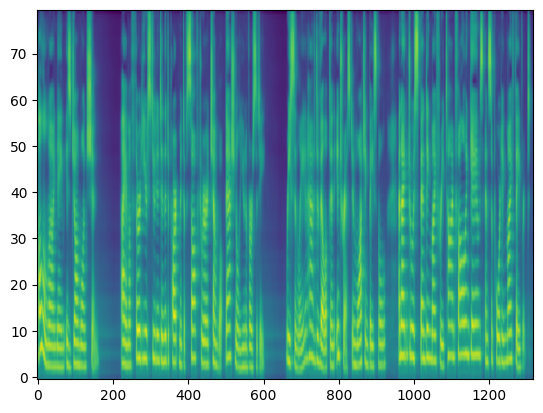

In [25]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = "Hello, my name is Jonghwan Shin. I am a third-year student in the Department of Software at Chungbuk National University. Recently, I have developed an interest in watching baseball, and I enjoy spending my free time following games and supporting my favorite teams."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)


_ = plt.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")

torch.Size([80, 1390])
torch.Size([80, 1522])
torch.Size([80, 1422])


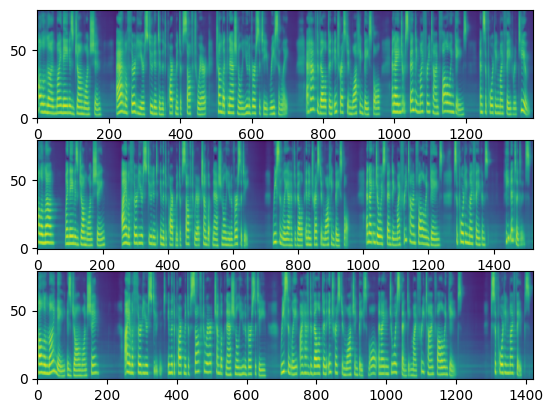

In [26]:
def plot():
    fig, ax = plt.subplots(3, 1)
    for i in range(3):
        with torch.inference_mode():
            spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
        print(spec[0].shape)
        ax[i].imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")


plot()

In [27]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "Hello, my name is Jonghwan Shin. I am a third-year student in the Department of Software at Chungbuk National University. Recently, I have developed an interest in watching baseball, and I enjoy spending my free time following games and supporting my favorite teams."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

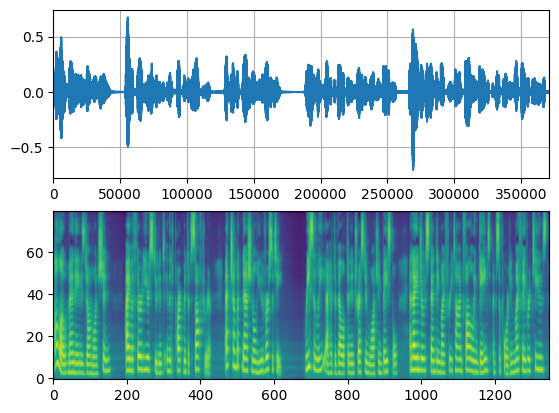

In [28]:
def plot(waveforms, spec, sample_rate):
    waveforms = waveforms.cpu().detach()

    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
    return IPython.display.Audio(waveforms[0:1], rate=sample_rate)


plot(waveforms, spec, vocoder.sample_rate)

In [29]:
bundle = torchaudio.pipelines.TACOTRON2_GRIFFINLIM_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
waveforms, lengths = vocoder(spec, spec_lengths)

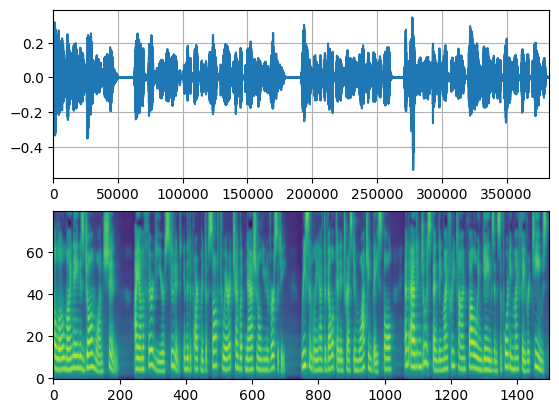

In [30]:
plot(waveforms, spec, vocoder.sample_rate)

In [31]:
# Workaround to load model mapped on GPU
# https://stackoverflow.com/a/61840832
waveglow = torch.hub.load(
    "NVIDIA/DeepLearningExamples:torchhub",
    "nvidia_waveglow",
    model_math="fp32",
    pretrained=False,
)
checkpoint = torch.hub.load_state_dict_from_url(
    "https://api.ngc.nvidia.com/v2/models/nvidia/waveglowpyt_fp32/versions/1/files/nvidia_waveglowpyt_fp32_20190306.pth",  # noqa: E501
    progress=False,
    map_location=device,
)
state_dict = {key.replace("module.", ""): value for key, value in checkpoint["state_dict"].items()}

waveglow.load_state_dict(state_dict)
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to(device)
waveglow.eval()

with torch.no_grad():
    waveforms = waveglow.infer(spec)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
/usr/local/lib/python3.12/dist-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


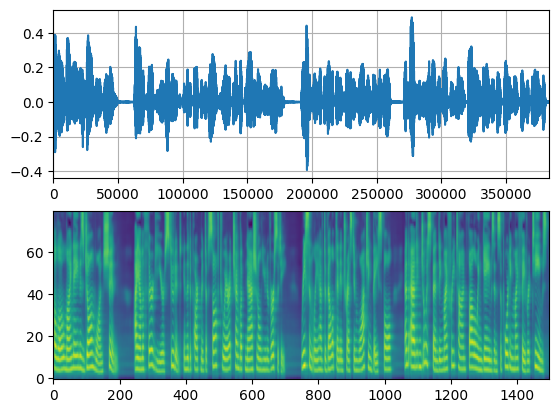

In [32]:
plot(waveforms, spec, 22050)